# **Chapter 16. Logistic Regression**

## The Problem

* We have an anonymized dataset of about 200 users, containing each user’s salary, her years of experience as a data scientist, and whether she paid for a premium account. 
* As is typical with categorical variables, we represent the dependent variable as either 0 (no premium account) or 1 (premium account).

In [ ]:
tuples = [(0.7,48000,1),(1.9,48000,0),(2.5,60000,1),(4.2,63000,0),(6,76000,0),(6.5,69000,0),(7.5,76000,0),(8.1,88000,0),(8.7,83000,1),(10,83000,1),(0.8,43000,0),(1.8,60000,0),(10,79000,1),(6.1,76000,0),(1.4,50000,0),(9.1,92000,0),(5.8,75000,0),(5.2,69000,0),(1,56000,0),(6,67000,0),(4.9,74000,0),(6.4,63000,1),(6.2,82000,0),(3.3,58000,0),(9.3,90000,1),(5.5,57000,1),(9.1,102000,0),(2.4,54000,0),(8.2,65000,1),(5.3,82000,0),(9.8,107000,0),(1.8,64000,0),(0.6,46000,1),(0.8,48000,0),(8.6,84000,1),(0.6,45000,0),(0.5,30000,1),(7.3,89000,0),(2.5,48000,1),(5.6,76000,0),(7.4,77000,0),(2.7,56000,0),(0.7,48000,0),(1.2,42000,0),(0.2,32000,1),(4.7,56000,1),(2.8,44000,1),(7.6,78000,0),(1.1,63000,0),(8,79000,1),(2.7,56000,0),(6,52000,1),(4.6,56000,0),(2.5,51000,0),(5.7,71000,0),(2.9,65000,0),(1.1,33000,1),(3,62000,0),(4,71000,0),(2.4,61000,0),(7.5,75000,0),(9.7,81000,1),(3.2,62000,0),(7.9,88000,0),(4.7,44000,1),(2.5,55000,0),(1.6,41000,0),(6.7,64000,1),(6.9,66000,1),(7.9,78000,1),(8.1,102000,0),(5.3,48000,1),(8.5,66000,1),(0.2,56000,0),(6,69000,0),(7.5,77000,0),(8,86000,0),(4.4,68000,0),(4.9,75000,0),(1.5,60000,0),(2.2,50000,0),(3.4,49000,1),(4.2,70000,0),(7.7,98000,0),(8.2,85000,0),(5.4,88000,0),(0.1,46000,0),(1.5,37000,0),(6.3,86000,0),(3.7,57000,0),(8.4,85000,0),(2,42000,0),(5.8,69000,1),(2.7,64000,0),(3.1,63000,0),(1.9,48000,0),(10,72000,1),(0.2,45000,0),(8.6,95000,0),(1.5,64000,0),(9.8,95000,0),(5.3,65000,0),(7.5,80000,0),(9.9,91000,0),(9.7,50000,1),(2.8,68000,0),(3.6,58000,0),(3.9,74000,0),(4.4,76000,0),(2.5,49000,0),(7.2,81000,0),(5.2,60000,1),(2.4,62000,0),(8.9,94000,0),(2.4,63000,0),(6.8,69000,1),(6.5,77000,0),(7,86000,0),(9.4,94000,0),(7.8,72000,1),(0.2,53000,0),(10,97000,0),(5.5,65000,0),(7.7,71000,1),(8.1,66000,1),(9.8,91000,0),(8,84000,0),(2.7,55000,0),(2.8,62000,0),(9.4,79000,0),(2.5,57000,0),(7.4,70000,1),(2.1,47000,0),(5.3,62000,1),(6.3,79000,0),(6.8,58000,1),(5.7,80000,0),(2.2,61000,0),(4.8,62000,0),(3.7,64000,0),(4.1,85000,0),(2.3,51000,0),(3.5,58000,0),(0.9,43000,0),(0.9,54000,0),(4.5,74000,0),(6.5,55000,1),(4.1,41000,1),(7.1,73000,0),(1.1,66000,0),(9.1,81000,1),(8,69000,1),(7.3,72000,1),(3.3,50000,0),(3.9,58000,0),(2.6,49000,0),(1.6,78000,0),(0.7,56000,0),(2.1,36000,1),(7.5,90000,0),(4.8,59000,1),(8.9,95000,0),(6.2,72000,0),(6.3,63000,0),(9.1,100000,0),(7.3,61000,1),(5.6,74000,0),(0.5,66000,0),(1.1,59000,0),(5.1,61000,0),(6.2,70000,0),(6.6,56000,1),(6.3,76000,0),(6.5,78000,0),(5.1,59000,0),(9.5,74000,1),(4.5,64000,0),(2,54000,0),(1,52000,0),(4,69000,0),(6.5,76000,0),(3,60000,0),(4.5,63000,0),(7.8,70000,0),(3.9,60000,1),(0.8,51000,0),(4.2,78000,0),(1.1,54000,0),(6.2,60000,0),(2.9,59000,0),(2.1,52000,0),(8.2,87000,0),(4.8,73000,0),(2.2,42000,1),(9.1,98000,0),(6.5,84000,0),(6.9,73000,0),(5.1,72000,0),(9.1,69000,1),(9.8,79000,1),]
data = [list(row) for row in tuples]

xs = [[1.0] + row[:2] for row in data]  # [1, experience, salary]
ys = [row[2] for row in data]           # paid_account

* An obvious first attempt is to use linear regression and find the best model: $$\text{paid account} = \beta_0 + \beta_1\text{experience} + \beta_2\text{salary }+ \varepsilon$$

In [ ]:
#@title

import requests

url = 'https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/linear_algebra.py'
r = requests.get(url)

with open('linear_algebra.py', 'w') as f:
    f.write(r.text)

from linear_algebra import Vector, dot, vector_mean, vector_sum, sum_of_squares, distance, add, scalar_multiply

url = 'https://raw.githubusercontent.com/joelgrus/data-science-from-scratch/master/scratch/machine_learning.py'
r = requests.get(url)

with open('machine_learning.py', 'w') as f:
    f.write(r.text)

from machine_learning import train_test_split

import math
import random
import tqdm

from typing import List, Tuple

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def least_squares_fit(xs: List[Vector],
                      ys: List[float],
                      learning_rate: float = 0.001,
                      num_steps: int = 1000,
                      batch_size: int = 1) -> Vector:
    """
    Find the beta that minimizes the sum of squared errors
    assuming the model y = dot(x, beta).
    """
    # Start with a random guess
    guess = [random.random() for _ in xs[0]]

    for _ in tqdm.trange(num_steps, desc="least squares fit"):
        for start in range(0, len(xs), batch_size):
            batch_xs = xs[start:start+batch_size]
            batch_ys = ys[start:start+batch_size]

            gradient = vector_mean([sqerror_gradient(x, y, guess)
                                    for x, y in zip(batch_xs, batch_ys)])
            guess = gradient_step(guess, gradient, -learning_rate)

    return guess

def predict(x: Vector, beta: Vector) -> float:
    """assumes that the first element of x is 1"""
    return dot(x, beta)
    
def error(x: Vector, y: float, beta: Vector) -> float:
    return predict(x, beta) - y

def squared_error(x: Vector, y: float, beta: Vector) -> float:
    return error(x, y, beta) ** 2

def sqerror_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    err = error(x, y, beta)
    return [2 * err * x_i for x_i in x]

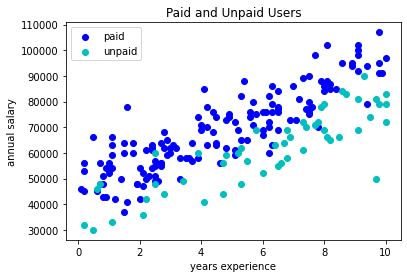

In [ ]:
from matplotlib import pyplot as plt

paidx = [row[0] for row in data if row[2] == 0]
paidy = [row[1] for row in data if row[2] == 0]
unpaidx = [row[0] for row in data if row[2] == 1]
unpaidy = [row[1] for row in data if row[2] == 1]

plt.scatter(paidx, paidy, c='b')
plt.scatter(unpaidx, unpaidy, c='c')
plt.xlabel('years experience')
plt.ylabel('annual salary')
plt.title('Paid and Unpaid Users')
plt.legend(['paid', 'unpaid'])
plt.show()

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 515.27it/s]


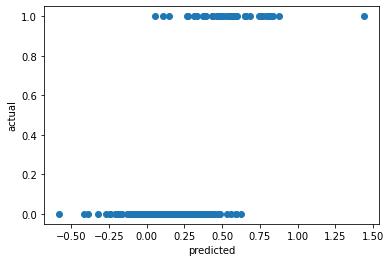

In [ ]:
from matplotlib import pyplot as plt

learning_rate = 0.001
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1)
# [0.26, 0.43, -0.43]
predictions = [predict(x_i, beta) for x_i in rescaled_xs]
    
plt.scatter(predictions, ys)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.show()

* We'd like for our predicted outputs to be 0 or 1, to indicate class membership. But the outputs of the linear model can be huge positive numbers or even negative numbers, which it's not clear how to interpret.
* The linear regression model assumed that the errors were uncorrelated with the
columns of _x_. But here, the regression coefficient for experience is 0.43, indicating that more experience leads to a greater likelihood of a premium account. This means that our model outputs very large values for people with lots of experience.  But we know that the actual values must be at most 1, which means that necessarily very large outputs (and therefore very large values of experience) correspond to very large negative values of the error term. Because this is the case, our estimate of `beta` is biased.

# The Logistic Function

* In the case of logistic regression, we use the logistic function, pictured as follows:

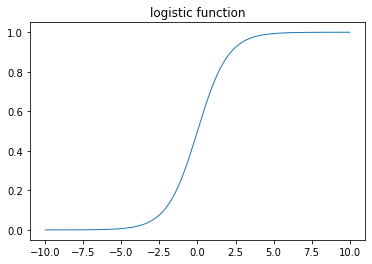

In [ ]:
def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

import numpy as np

X = np.linspace(-10, 10, 300)
Y = [logistic(x) for x in X]

plt.plot(X, Y, linewidth=1)
plt.title('logistic function')
plt.show()

* Its derivative is given as follows:

In [ ]:
def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)

* We will use this to fit a model:
$$y_i = f(x_i \beta) + \varepsilon_i$$
where $f$ is the **logistic** function.

* Recall that for linear regression we fit the model by minimizing the sum of squared errors, which ended up choosing the $\beta$ that maximized the likelihood of the data.

* Given some $\beta$, our model says that each $y_i$ should equal $1$ with probability $f(x_i\beta)$ and $0$ with probability $1 − f(x_i\beta)$.

* In particular, the PDF for $y_i$ can be written as:
$$p(y_i|x_i,\beta) = f(x_i \beta)^{y_i}(1 − f(x_i\beta))^{1 − y_i}$$
since if $y_i$ is 0, this equals:
$$1 − f(x_i\beta)$$
and if $y_i$ is 1, it equals:
$$f(x_i\beta)$$

* It turns out that it's actually simpler to maximize the **log likelihood**:
$$\log L(\beta | x_i, y_i) = y_i \log f(x_i\beta) + (1 − y_i)\log(1 − f(x_i\beta))$$
Because log is a strictly increasing function, any beta that maximizes the log likelihood also maximizes the likelihood, and vice versa. Because gradient descent minimizes things, we'll actually work with the _negative_ log likelihood, since maximizing the likelihood is the same as minimizing its negative:

* If we assume different data points are independent from one another, the overall likelihood is just the product of the individual likelihoods. That means the overall log likelihood is the sum of the individual log likelihoods:

In [ ]:
import math

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float:
    """The negative log likelihood for one data point"""
    if y == 1:
        return -math.log(logistic(dot(x, beta)))
    else:
        return -math.log(1 - logistic(dot(x, beta)))

def negative_log_likelihood(xs: List[Vector],
                            ys: List[float],
                            beta: Vector) -> float:
    return sum(_negative_log_likelihood(x, y, beta)
               for x, y in zip(xs, ys))

* A little bit of calculus gives us the gradient:

In [ ]:
def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float:
    """
    The j-th partial derivative for one data pont
    here i is the index of the data point
    """
    return -(y - logistic(dot(x, beta))) * x[j]

def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """
    The gradient for one data point
    """
    return [_negative_log_partial_j(x, y, beta, j)
            for j in range(len(beta))]

def negative_log_gradient(xs: List[Vector],
                          ys: List[float],
                          beta: Vector) -> Vector:
    return vector_sum([_negative_log_gradient(x, y, beta)
                       for x, y in zip(xs, ys)])

# Applying the Model

In [ ]:
random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)
    
learning_rate = 0.01
    
# pick a random starting point
beta = [random.random() for _ in range(3)]
    
with tqdm.trange(5000) as t:
    for epoch in t:
        gradient = negative_log_gradient(x_train, y_train, beta)
        beta = gradient_step(beta, gradient, -learning_rate)
        loss = negative_log_likelihood(x_train, y_train, beta)
        t.set_description(f"loss: {loss:.3f} beta: {beta}")
    
means, stdevs = scale(xs)
beta_unscaled = [(beta[0]
                  - beta[1] * means[1] / stdevs[1]
                  - beta[2] * means[2] / stdevs[2]),
                  beta[1] / stdevs[1],
                  beta[2] / stdevs[2]]
# [8.9, 1.6, -0.000288]
            
assert (negative_log_likelihood(xs, ys, beta_unscaled) ==
        negative_log_likelihood(rescaled_xs, ys, beta))

loss: 39.963 beta: [-2.0239032476251424, 4.693047853942649, -4.469811321910748]: 100%|██████████| 5000/5000 [00:26<00:00, 190.20it/s]


* What we can say is that—all else being equal—people with more experience are more likely to pay for accounts. And that—all else being equal—people with higher salaries are less likely to pay for accounts. (This was also somewhat apparent when we plotted the data.)

0.75 0.8


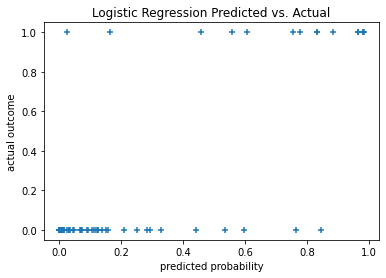

In [ ]:
true_positives = false_positives = true_negatives = false_negatives = 0
    
for x_i, y_i in zip(x_test, y_test):
    prediction = logistic(dot(beta, x_i))
    
    if y_i == 1 and prediction >= 0.5:  # TP: paid and we predict paid
        true_positives += 1
    elif y_i == 1:                      # FN: paid and we predict unpaid
        false_negatives += 1
    elif prediction >= 0.5:             # FP: unpaid and we predict paid
        false_positives += 1
    else:                               # TN: unpaid and we predict unpaid
        true_negatives += 1
    
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
            
print(precision, recall)
    
assert precision == 0.75
assert recall == 0.8
    
predictions = [logistic(dot(beta, x_i)) for x_i in x_test]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("predicted probability")
plt.ylabel("actual outcome")
plt.title("Logistic Regression Predicted vs. Actual")
plt.show()

* This gives a precision of 75% ("when we predict paid account we're right 75% of the time") and a recall of 80% ("when a user has a paid account we predict paid account 80% of the time"), which is not terrible considering how little data we have.

## Support Vector Machines

* An alternative approach to classification is to just look for the hyperplane that "**best**" separates the classes in the training data. This is the idea behind the **support vector machine**, which finds the hyperplane that maximizes the distance to the nearest point in each class.

![picture](https://drive.google.com/uc?id=1wW1lehK7N5VKnCxZD_WqmdpZ9YrWf6WI)

* We can sometimes get around this by transforming the data into a higher-dimensional space. For example, consider the simple one-dimensional dataset shown in:

![picture](https://drive.google.com/uc?id=1q6GrspVfFDYMV4cGvBPJPi4E7wfvnPLJ)

* It's clear that there's no hyperplane that separates the positive examples from the negative ones. However, look at what happens when we map this dataset to two dimensions by sending the point $x$ to $(x, x^2)$. Suddenly it’s possible to find a hyperplane that splits the data.

* This is usually called the **kernel trick** because rather than actually mapping the points into the higher-dimensional space (which could be expensive if there are a lot of points and the mapping is complicated), we can use a "kernel" function to compute dot products in the higher-dimensional space and use those to find a hyperplane.

![picture](https://drive.google.com/uc?id=18AwzI8-YbLhGqOwcvaFfCiTjO4NCOUBn)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


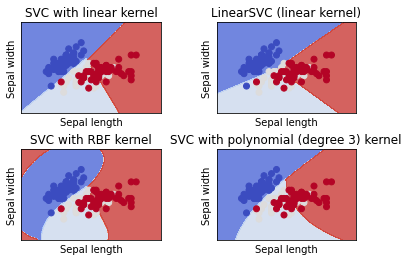

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

Refer to the [LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) site.